# Vehicle Intersection

## Initialization

In [1]:
%matplotlib notebook
import sys, os

# Importing AIMA tools
# If you have not copied the contents of the template directly into the AIMA folder, you can uncomment the next line.
#sys.path.append(os.path.realpath("./aima")) # Modify the ./aima to the relative path of your aima folder.

from utils import expr
from kb import DpllPropKB, FCPropKB

import configurations as confs
from field_var import field_var
from ask_solution import ask_solution
from generate_knowledge import generate_knowledge
from visualize import draw

##  Vehicle Intersection

In this exercise  you have to generate a knowledge base to find the right ordering for up to four vehicles
that want to cross an intersection.

The initialized configuration is given as a list of strings. This list has length 4, corresponding to the 4 vehicles that may be involved in this intersection scenario.
The elements of the list specify the state of the corresponding vehicle and the traffic sign it has to follow, if any.
The configuration list contains the following values: 'empty','right of way','stop' and ' '.

- 'empty' means the corresponding vehicle does not exist.
- 'right of way' means that the corresponding vehicle has a **Right-of-Way** sign. <img style="vertical-align: -13px; display: inline;" src="Images/row.png">
- 'stop' means that the corresponding vehicle has a **Stop** sign. <img style="vertical-align: -13px; display: inline;" src="Images/stop.png">
- ' ' means that the corresponding vehicle exists but does not have any specific signs to obey.

In this exercise, you will be given 5 predefined configurations for the intersection. You can select one such configuration as follows:

In [2]:
# You can choose a configuration by setting the variable conf_index (possible values: 1, 2, 3, 4, 5)
conf_index = 1
conf = getattr(confs, "intersection"+str(conf_index))
exact_solution = getattr(confs, "solution"+str(conf_index))

## As you can see, conf is a list consisting of 4 elements: 
print('The configuration: ', conf)

## Here is a more detailed description of the conf list:
print('Pretty print of the intersection list: ')
for i, vehicle in enumerate(conf):
    if vehicle == 'empty':
        print('The %d. vehicle does not exist'%i)
    elif vehicle == 'right of way':
        print('The %d. vehicle has to drive first'%i)
    elif vehicle == 'stop':
        print('The %d. vehicle has to drive last'%i)
    else:
        print('The %d. vehicle has to pay attention to the rule "right before left"'%i)

# You can access the list elements with conf[i]
print('The configuration for the 0. vehicle is: ', conf[0])
print('The configuration for the 1. vehicle is: ', conf[1])

The configuration:  ['', 'stop', '', '']
Pretty print of the intersection list: 
The 0. vehicle has to pay attention to the rule "right before left"
The 1. vehicle has to drive last
The 2. vehicle has to pay attention to the rule "right before left"
The 3. vehicle has to pay attention to the rule "right before left"
The configuration for the 0. vehicle is:  
The configuration for the 1. vehicle is:  stop


The configuration can also be modelled, so that the order in which each vehicle passes the intersection can be better visualized. Note that only one car may drive at any one time.

<IPython.core.display.Javascript object>


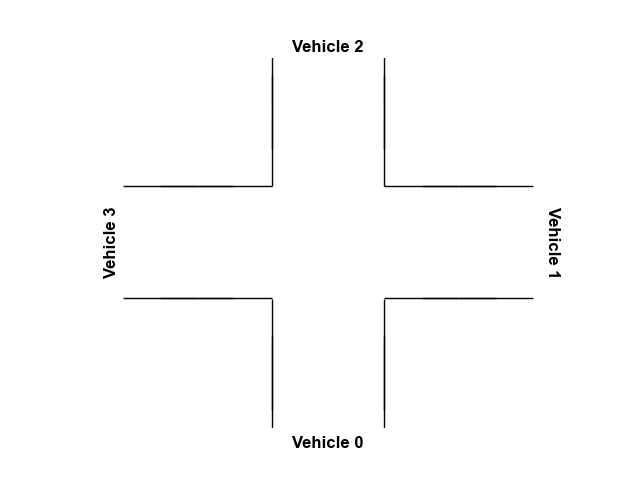

In [3]:
# A basic example of a configuration
conf_example = ['', '', '', 'empty']

# The solution to the intersection problem is then given a list, with each element describing
# in which turn the corresponding vehicle can pass through the intersection.
# For this concrete example, we give the exact solution. Later on, your task will be
# to write an algorithm that derives this solution given any initial configuration.
vehicle_solution_example = [3,2,1,0]
_ = draw((conf_example, vehicle_solution_example))

## Knowledge Base generation

### Variables: 
For the sake of simplicity, in this homework there is only one type of variable: 

- $V_{n,\ x}$, which means that the vehicle $n$ gets assigned the number $x$, with $n = 0,...,3$ and $x = 0,...,4$. For example, $V_{0,\ 1}$ means that the vehicle 0 (bottom) drives first, $V_{2,\ 4}$ means that vehicle 2 (top) drives fourth and $V_{3,\ 2}$ means that vehicle 3 (left) drives second.
- A vehicle that does not exist (empty lane) gets assigned a 0. For example, $V_{2,\ 0}$ means that vehicle 2 (top) does not exist.

### The field_var method will help you generate correct  variables:

In [4]:
### Example
# The vehicle 2 does not exist:
V20 = field_var(2, 0)
# The vehicle 0 drives first:
V01 = field_var(0, 1)
# The vehicle 1 drives fourth:
V14 = field_var(1, 4)

Always use this method to generate a field variable.

## Your Knowledge Base

Your task for this exercise is to solve the intersection problem using propositional logic, by designing a knowledge base that describes all rules and initial information about the problem.

You should test this implementation on all 5 initial configurations that are given for this exercise. After handing in your implementation, it will be tested on another 10 initial configurations that will be hidden to you to check the correctness of your knowledge base. Only if all scenarios are solved correctly will you have completed the exercise.

### The ordering of the vehicles must be solved according to the following rules:

 - A vehicle that has a **Right-of-Way** sign <img style="vertical-align: -13px; display: inline;" src="Images/row.png"> drives before all other vehicles.
 - A vehicle that has a **Stop** sign <img style="vertical-align: -13px; display: inline;" src="Images/stop.png"> drives after all other vehicles.
 - For two vehicles that have no signs, the **Right-before-Left** rule has to be obeyed: The vehicle that arrives from the right of the other vehicle passes first, the other has to wait (an example for this rule is shown below).
 - Vehicles can only drive one after the other, so that no two vehicles pass at the same time.
 
For the sake of simplicity, we assume that every vehicle only drives straight, so that there are no turns. Furthermore, all initial configurations that are given are guaranteed to have unique solution. Finally, unlike for most roads in Europe, in this exercise the Right-of-Way sign applies only on the lane it is assigned to, **not** the opposite lane as well (see example below).

Since this problem is based on general logic rules, it can be solved using propositional logic.



### Some specific examples

To help you better understand the traffic rules, we list a few interesting cases:

  - This illustrates the Right-before-Left rule: Since V2 (top) is on the right of V1 (right), it thus drives first:
 ![rightofway](Images/Example1.png) 
  
  - This illustrates the use of the Right-of-Way sign and the Right-before-Left rule: V0 (bottom) drives first since it has a Right-of-Way sign. Since V3 (left) is on the right of V2 (top), V3 drives second, followed by V2 driving third. V1 (right) is empty and thus gets assigned 0:
![rightofway](Images/Example2.png)
  
  
  - This illustrates the use of the Stop sign: V3 (left) drives last since it has a Stop sign and thus has to wait. Meanwhile, V2 (top) drives first since it is on the right of V1 (right), V1 then drives second, meaning that V3 (left) drives third. V0 (bottom) is empty and thus gets assigned 0:
![rightofway_stop](Images/Example3.png)


  - For this intersection, V0 (bottom) drives second, V1 (right) first, V2 (top) fourth, V3 (left) third.
 ![right_before_left](Images/Example4.png)


### Sample knowledge base generation

In [5]:
def generate_knowledge_example(conf):
    kb = []
    ##remember to build the knowledge base according to the configuration given
    if conf[i] == 'empty':
        new_proposition = field_var(i,0) # Vi0 
        kb.append(new_proposition)

    new_proposition = field_var(1,x) + " | ~" + field_var(2,y) # V1x ∨ ¬V2x
    kb.append(new_proposition)

    new_proposition = field_var(3,1) + " ==> " + field_var(3,1) # V31 ==> V31
    kb.append(new_proposition)

    new_proposition = field_var(2,x) + " & ~" + field_var(3,y) + " <=> " + field_var(1,z) # V2x ∧ ¬V3y <=> V1z
    kb.append(new_proposition)

    new_proposition = field_var(3,1) + " <== " + field_var(3,1) # V31 <== V31
    kb.append(new_proposition)


    return kb

## Your Task

Implement the function **generate_knowledge** in **generate_knowledge.py** such that the function takes **conf** as input and outputs the knowledge basis. 

Feel free to define in **generate_knowledge.py** any helper function you may need, but do not import any additional modules or packages, otherwise your solution will be marked as failed. This exercise is easily solvable without any additional packages.

Refer to the function **generate_knowledge_example** in the previous cell for correct syntax.

In [6]:
from generate_knowledge import generate_knowledge

## Configuration

### Inference Algorithms:

In order to infer the correct solution from you knowledge base, an inference algorithm has to be chosen. We propose the following two algorithms:

- "FC"
  - Use this algorithm to use Forward Chaining, which is part of the lecture, for the inference.
  - Warning: the knowledge base should only contain clauses of the following forms for this to work:
     - α & .. & β ==> γ & .. & δ
     - α & .. & β <== γ & .. & δ
     - α & .. & β <=> γ & .. & δ
     - α & .. & β\
  -  In particular, FC does **not** support the | (disjunction) and ~ (negation) operators.

- "Dpll"
  - Use this knowledge base for inference using the DPLL algorithm, which is not part of the lecture.
  - This works for every kind of knowledge base, and is therefore stronlgy recommended for this exercise.

In [7]:
# Choose here your inference algorithm.
# Possible values: "Dpll", "FC"
kb_gen = "Dpll" # We recommend the use of Dpll for this exercise.

KB = globals()[kb_gen+"PropKB"]

## Inference

Once you have implemented your code in **generate_knowledge**, you can execute the next lines to see the solution that your implementation computes.

feed knowledge base with knowledge..
scan knowledge base for contradictions..
Pretty print of the driving order of each vehicle: 
The driving order of the 0. vehicle is: 1
The driving order of the 1. vehicle is: 4
The driving order of the 2. vehicle is: 3
The driving order of the 3. vehicle is: 2
Your solution is:  [1, 4, 3, 2]
The actual solution is:  [1, 4, 3, 2]


<IPython.core.display.Javascript object>


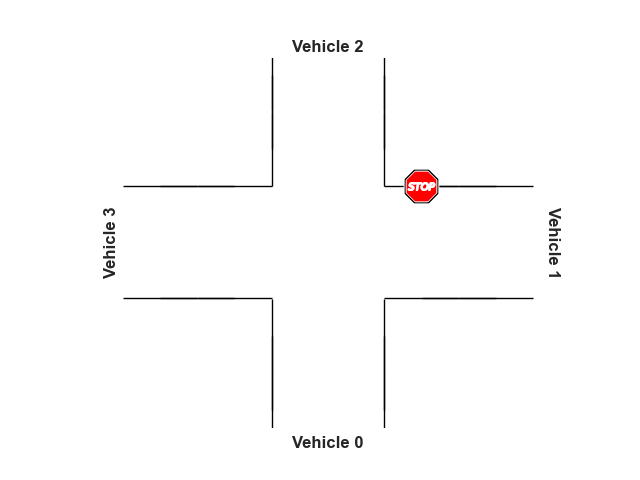

In [8]:
kb = KB() # create empty knowledge base

print("feed knowledge base with knowledge..")
for str_expr in generate_knowledge(conf):
    kb.tell(expr(str_expr))

# check if the knowledge base is obviosly wrong (you can remove this if it is too slow)
print("scan knowledge base for contradictions..")
assert not kb.has_contradicting_knowledge()

vehicle_solution = ask_solution(kb)

print('Pretty print of the driving order of each vehicle: ')
for i, position in enumerate(vehicle_solution):
    if position == 0:
        print ("The %d. vehicle does not exist"%(i))
    else:
        print("The driving order of the %d. vehicle is: %d"%(i, position))
        
print('Your solution is: ', vehicle_solution)
print('The actual solution is: ', exact_solution)
 #draw the inferred solution visualizing in which order the vehicle(s) cross the intersection if at least one vehicle exists
all_are_zero = True
for element in vehicle_solution:
    if element !=0:
        all_are_zero = False
        break

if not all_are_zero:
    _ = draw((conf, vehicle_solution))